# Runtime vs Box Office Sales 

In [1]:
#chart 3
import pandas as pd
m = pd.read_csv('zippedData/rt.movie_info.tsv',delimiter='\t',encoding='windows-1252') 
m.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [2]:
m.box_office.isnull().describe()

count     1560
unique       2
top       True
freq      1220
Name: box_office, dtype: object

In [3]:
m[m.box_office.notnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


In [4]:
m = m[m.runtime.notnull()&m.box_office.notnull()]
m['runtime'] = m.runtime.str.replace(' minutes', '').astype('int')
m['box_office'] = m.box_office.str.replace(',', '').astype('int')

In [5]:
m.runtime

1       108
6        82
7       123
8       117
15      108
       ... 
1541    119
1542    129
1545     98
1546     97
1555    106
Name: runtime, Length: 338, dtype: int64

<AxesSubplot:xlabel='runtime', ylabel='Count'>

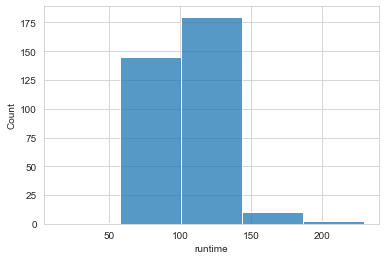

In [35]:
sns.histplot(data=m, x="runtime", bins=5)

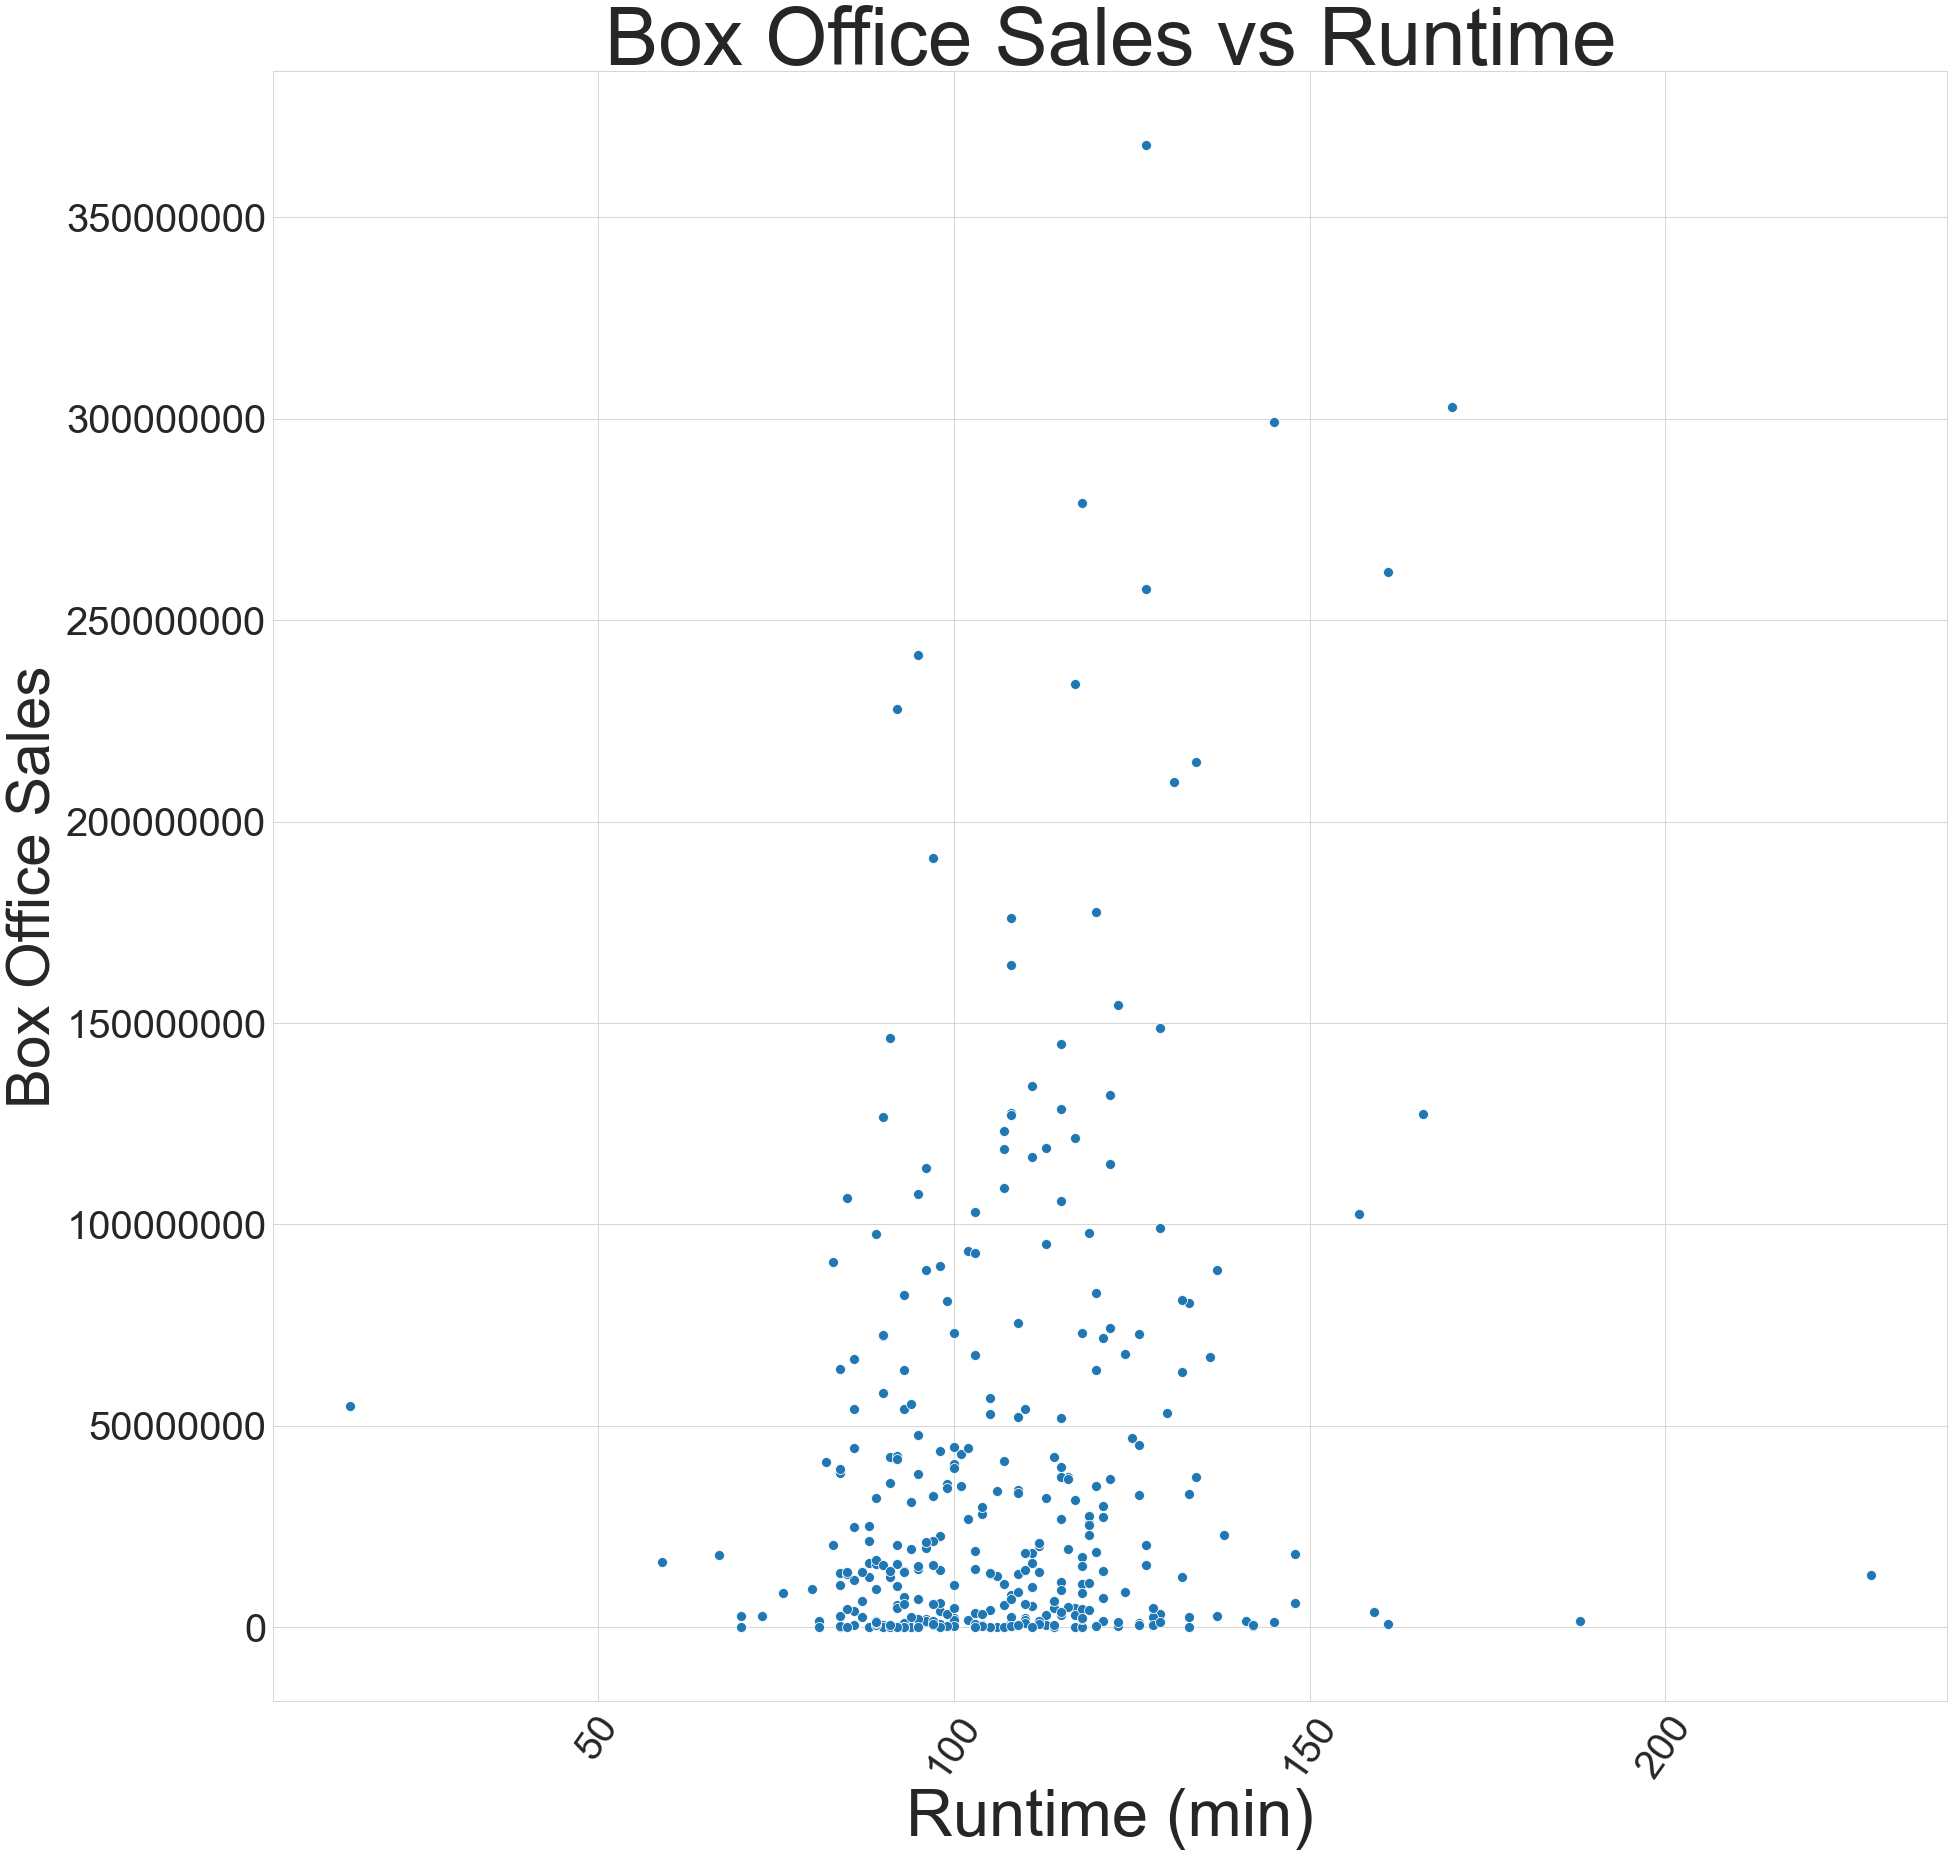

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig ,ax = plt.subplots(figsize= (30,30))
plt.xticks(rotation = 55) #makes the x axis more vertical
ax.set_xlabel("Runtime (min)", fontsize = 65)  #labels the axes
ax.set_ylabel("Box Office Sales", fontsize =60)
ax.set_title('Box Office Sales vs Runtime', fontsize = 80)
sns.set_style("whitegrid")
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)  #number size for axes 

sns.scatterplot(data=m, x="runtime", y="box_office",s = 100) #s = 100 is the size of the dots 
ax.ticklabel_format(style='plain', axis='y')  #fixes scientific notation issue